# Objective: This is a short demo. of the causal impact analysis package that was built by Jamal Senouci

#### https://github.com/jamalsenouci/causalimpact/blob/master/GettingStarted.ipynb

### Install the package (if you haven't)

In [1]:
# !pip install git+https://github.com/jamalsenouci/causalimpact.git

  Cloning https://github.com/jamalsenouci/causalimpact.git to /private/var/folders/kp/0xhxrf4s1_v83t23xdhrsy6xn803mq/T/pip-TMKn1Q-build
  Running setup.py install for causalimpact ... done


### Import the causal impact package and other python data analysis & visualization packages

In [1]:
from causalimpact import CausalImpact

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 6)

### Reading in the data and display the top 5 records
#### This is only a dummy data with two time series columns

In [15]:
data = pd.read_csv('Transactions.csv',header=None,names = ['Treatment','Control'])

In [16]:
data.head()

,Treatment,Control
0,329,321
1,355,276
2,783,757
3,535,475
4,313,302


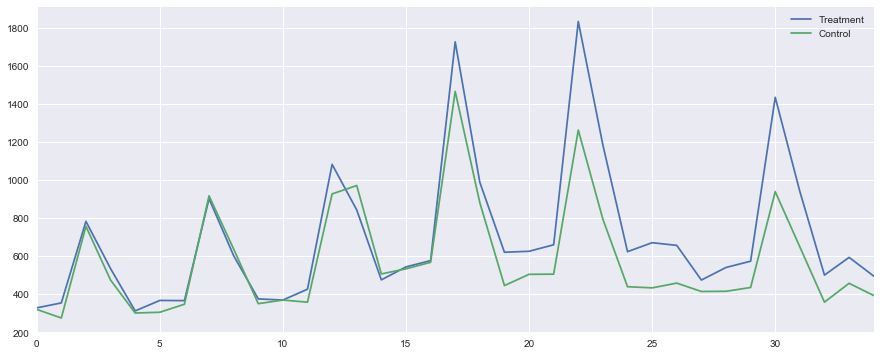

In [17]:
data.plot()

### Setting the cut off point for the pre and post period

In [36]:
cut_off_point = 12
pre_period = [0,cut_off_point-1]
post_period = [cut_off_point,data.shape[0]-1]
print(pre_period)
print(post_period)

[0, 11]
[12, 34]


### Executing the causal impact function

In [37]:
impact = CausalImpact(data, pre_period, post_period)

In [38]:
impact.run()

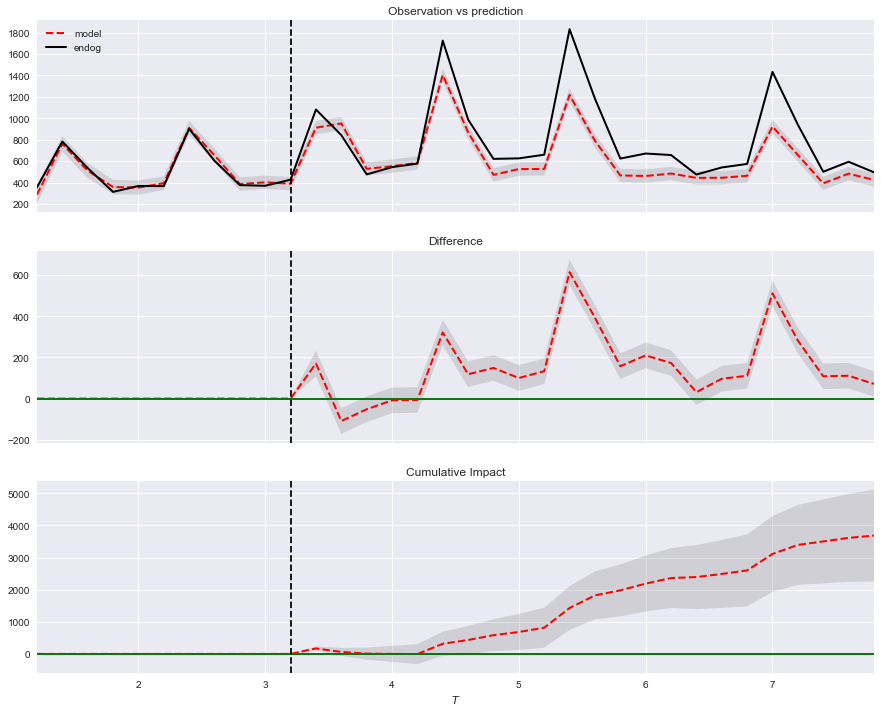

In [39]:
impact.plot()

### Display the summary

In [40]:
print(impact.summary())

                        Average      Cumulative
Actual                      811           18664
Predicted                   651           14979
95% CI               [589, 713]  [13549, 16410]
                                               
Absolute Effect             160            3684
95% CI                [222, 97]    [5114, 2253]
                                               
Relative Effect           24.6%           24.6%
95% CI           [34.1%, 15.0%]  [34.1%, 15.0%]
None


### Repeat the same process but for different metric (value)

In [29]:
value_data = pd.read_csv('Value.csv',header=None,names = ['Treatment','Control'])

In [30]:
value_data.head()

,Treatment,Control
0,27899.88,31427.24
1,29133.18,23338.26
2,67985.26,66644.99
3,45780.05,37080.72
4,25857.39,27351.38


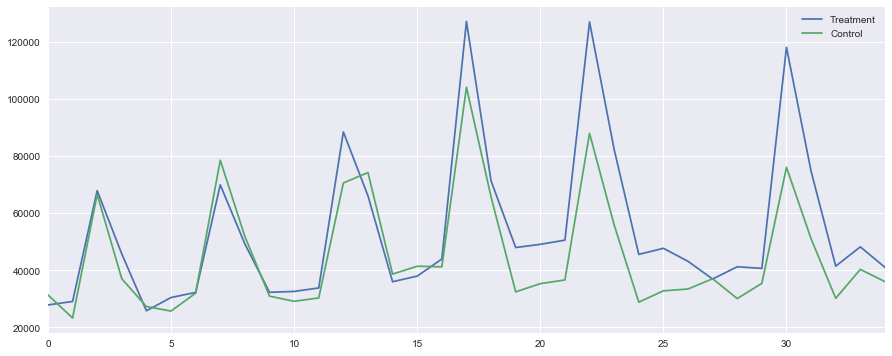

In [31]:
value_data.plot()

In [41]:
value_impact = CausalImpact(value_data,pre_period,post_period)

In [42]:
value_impact.run()

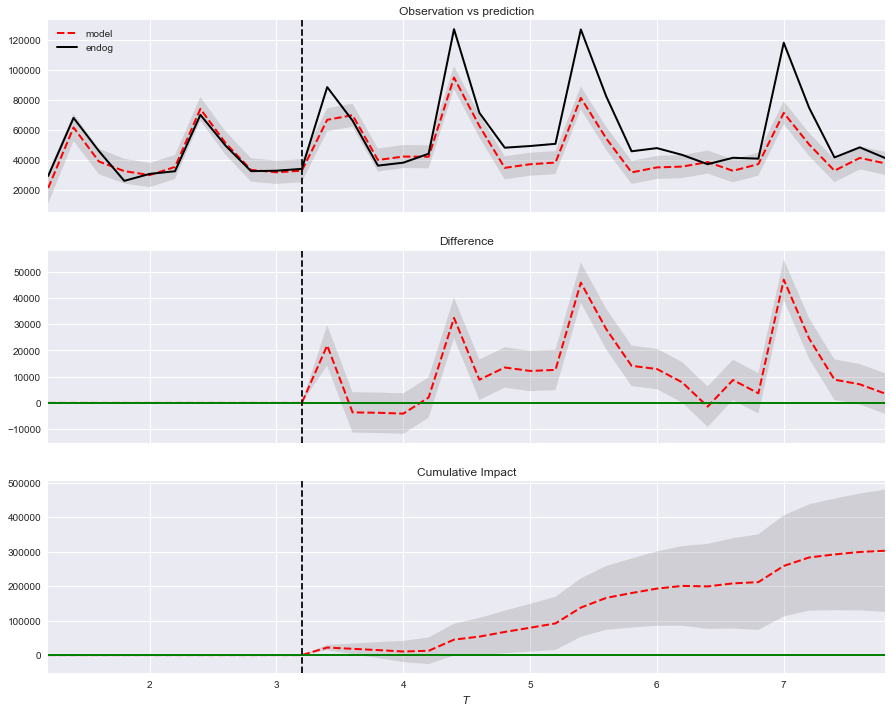

In [43]:
value_impact.plot()

In [44]:
value_impact.summary()

                        Average         Cumulative
Actual                    61241            1408550
Predicted                 48086            1105990
95% CI           [40384, 55788]  [928839, 1283140]
                                                  
Absolute Effect           13154             302560
95% CI            [20857, 5452]   [479711, 125410]
                                                  
Relative Effect           27.4%              27.4%
95% CI           [43.4%, 11.3%]     [43.4%, 11.3%]
